## Team StackOverflow :

## Stack OverFlow Dataset Analysys

## 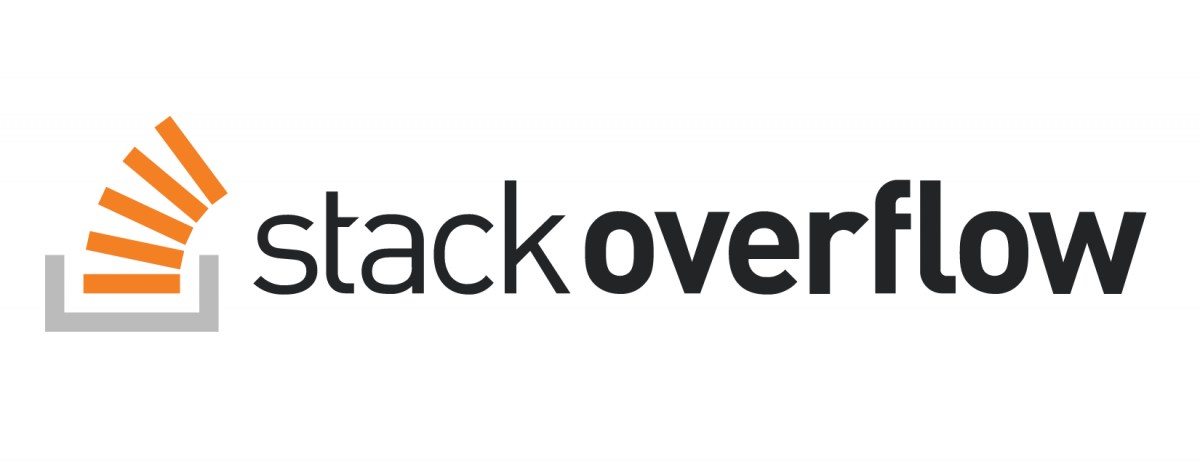

In [43]:
#Importing the some inbuit anyalysis functions
import os
import struct
import pandas as pd
import math
import numpy as np
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import scipy.stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import collections

In [44]:
from numpy import random
import seaborn as sns

In [5]:
#This is Here We are importing the Data set.(Questions,Answers And Tags)

df_questions = pd.read_csv("/home/pranavhegde/Downloads/Stack/Questions.csv", nrows=50000,usecols =['Id', 'OwnerUserId', 'CreationDate', 'ClosedDate', 'Score','Title','Body'],encoding='latin1')
df_questions = df_questions.dropna()
df_questions.head(10)

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
6,470,71.0,2008-08-02T15:11:47Z,2016-03-26T05:23:29Z,13,Homegrown consumption of web services,<p>I've been writing a few web services for a ...
27,2540,136.0,2008-08-05T16:30:37Z,2014-04-03T15:36:28Z,39,Good STL-like library for C,<p>What are good libraries for C with datastru...
29,2630,17.0,2008-08-05T18:01:32Z,2012-02-22T01:58:23Z,14,What are your favorite Powershell Cmdlets?,<p>I just found /n softwares free Powershell N...
35,2970,58.0,2008-08-05T23:55:25Z,2012-03-06T03:17:01Z,17,My website got hacked... What should I do?,<p>My dad called me today and said people goin...
37,3180,479.0,2008-08-06T08:47:45Z,2012-08-13T12:20:03Z,29,Anyone soloing using fogbugz?,<p>Is there anyone working solo and using fogb...
45,4080,235.0,2008-08-06T22:45:27Z,2012-05-05T13:39:59Z,92,What code analysis tools do you use for your J...,<p>What code analysis tools do you use on your...
46,4110,369.0,2008-08-06T23:19:50Z,2014-12-30T11:43:01Z,7,What program can I use to generate diagrams of...,<p>I've been tasked with redesigning part of a...
59,5170,383.0,2008-08-07T19:06:03Z,2012-10-18T03:03:05Z,90,SQL Server Management Studio alternatives to b...,<p>I was wondering if there are any alternativ...
61,5460,590.0,2008-08-07T23:00:30Z,2012-11-16T12:21:26Z,3,Telligent's Community Server,<p>The company I work for is wanting to add bl...


In [6]:
#Fetching the Data
df_Answers= pd.read_csv("/home/pranavhegde/Downloads/Stack/Answers.csv", nrows=10000,usecols =['Id', 'OwnerUserId', 'CreationDate', 'ParentId', 'Score','Body'],encoding='latin1')
df_Answers = df_Answers.dropna()
df_Answers.head(10)

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."
5,332,59.0,2008-08-02T03:00:24Z,330,19,<p>I would be a bit reluctant to use nested cl...
6,344,100.0,2008-08-02T04:18:15Z,260,6,<p>You might be able to use IronRuby for that....
7,359,119.0,2008-08-02T06:16:23Z,260,5,"<P>You could use any of the DLR languages, whi..."
8,473,49.0,2008-08-02T15:33:13Z,470,8,"<p>No, what you're doing is fine. Don't let th..."
9,529,86.0,2008-08-02T18:16:07Z,180,3,<p>Isn't it also a factor which order you set ...


In [7]:
df_Tags = pd.read_csv("/home/pranavhegde/Downloads/Stack/Tags.csv", nrows=10000,usecols =['Id', 'Tag'],encoding='latin1')
df_tags = df_Tags.dropna()
df_Tags.head(10)

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn
5,90,branch
6,90,branching-and-merging
7,120,sql
8,120,asp.net
9,120,sitemap


### Cleaning up the Data ,The results Shows there is 0 null value here

In [9]:
print('isNull\n\n',df_questions.isnull().sum())
print('isDuplicate', df_questions.duplicated().sum())

isNull

 Id              0
OwnerUserId     0
CreationDate    0
ClosedDate      0
Score           0
Title           0
Body            0
dtype: int64
isDuplicate 0


In [10]:
print('Questions shape: ', df_questions.shape)
print('Answers shape: ', df_Answers.shape)
print('Tags shape: ', df_Tags.shape)

Questions shape:  (1749, 7)
Answers shape:  (9742, 6)
Tags shape:  (10000, 2)


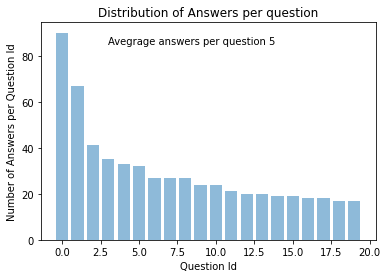

In [11]:
#Collecting the parameter of the data Distribution of the Answers
ans_per_question = collections.Counter(df_Answers['ParentId'])
quesId,nosAnswers = zip(*ans_per_question.most_common())

N=20
plt.bar(range(N), nosAnswers[:N], align='center', alpha=0.5)
plt.ylabel('Number of Answers per Question Id')
plt.xlabel('Question Id')
plt.title('Distribution of Answers per question')
plt.text(3,85,"Avegrage answers per question "+str(math.ceil((np.mean(nosAnswers)))))

plt.show()

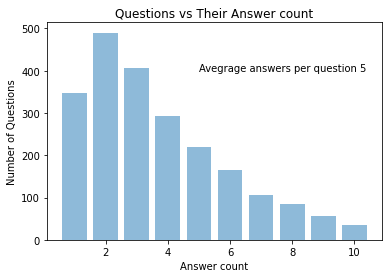

In [12]:
ans_freq_counter = collections.Counter(ans_per_question.values())
ans_count,nosQuestions = zip(*ans_freq_counter.most_common())

N=10

plt.bar(ans_count[:N], nosQuestions[:N], align='center', alpha=0.5)
plt.ylabel('Number of Questions')
plt.xlabel('Answer count')
plt.title('Questions vs Their Answer count')
plt.text(5,400,"Avegrage answers per question "+str(math.ceil((np.mean(nosAnswers)))))

plt.show()

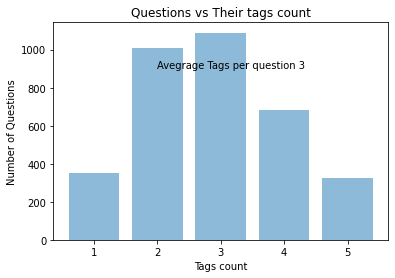

In [13]:
tags_per_question = collections.Counter(df_Tags['Id'])
tags_freq_counter = collections.Counter(tags_per_question.values())
tags_count,nosQuestions = zip(*tags_freq_counter.most_common())

N=100

plt.bar(tags_count[:N], nosQuestions[:N], align='center', alpha=0.5)
plt.ylabel('Number of Questions')
plt.xlabel('Tags count')
plt.title('Questions vs Their tags count')
plt.text(2,900,"Avegrage Tags per question "+str(math.ceil((np.mean(tags_count)))))

plt.show()

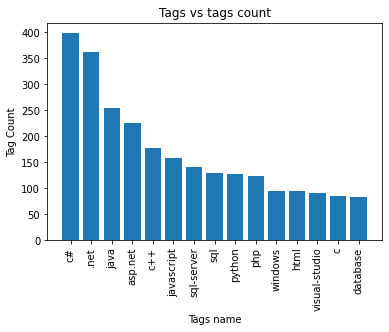

In [14]:
tagCount = collections.Counter(list(df_Tags['Tag']))
tagName,freq = zip(*tagCount.most_common(15))
plt.bar(tagName, freq )
plt.xticks(rotation='vertical')
plt.ylabel('Tag Count')
plt.xlabel('Tags name')
plt.title('Tags vs tags count')
plt.show()

<AxesSubplot:xlabel='datetime'>

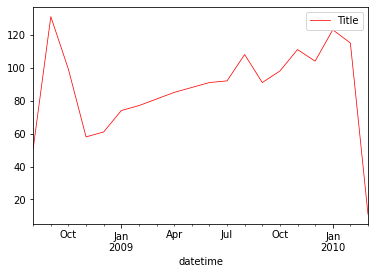

In [15]:
import datetime

df_questions['datetime'] = pd.to_datetime(df_questions['CreationDate'])
df_questions.set_index('datetime', inplace=True)

monthlyQues = df_questions.resample('M').count()
monthlyQues['datetime'] = monthlyQues.index
monthlyQues.plot(x='datetime', y='Title', kind='line', lw=0.75, c='r')

In [16]:
df_Tags['Tag'] = df_Tags['Tag'].astype(str)
grouped_tags = df_Tags.groupby("Id")['Tag'].apply(lambda tags: ' '.join(tags))

grouped_tags_final = pd.DataFrame({'Id':grouped_tags.index, 'Tags':grouped_tags})
grouped_tags.reset_index()

grouped_tags_final.head()

,Id,Tags
Id,,
80,80,flex actionscript-3 air
90,90,svn tortoisesvn branch branching-and-merging
120,120,sql asp.net sitemap
180,180,algorithm language-agnostic colors color-space
260,260,c# .net scripting compiler-construction


In [61]:
df_questions.drop(columns=['OwnerUserId', 'CreationDate', 'ClosedDate'], inplace=True)

# selecting the only questions which have score equal to or more than 5
score_gt_5 = df_questions['Score'] >= 5
ques = df_questions[score_gt_5]
ques.head()

,Id,Score,Title,Body
datetime,,,,
2008-08-01 14:41:24,90,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2008-08-02 15:11:47,470,13,Homegrown consumption of web services,<p>I've been writing a few web services for a ...
2008-08-05 16:30:37,2540,39,Good STL-like library for C,<p>What are good libraries for C with datastru...
2008-08-05 18:01:32,2630,14,What are your favorite Powershell Cmdlets?,<p>I just found /n softwares free Powershell N...
2008-08-05 23:55:25,2970,17,My website got hacked... What should I do?,<p>My dad called me today and said people goin...


In [66]:
merged_ques = df_questions.merge(grouped_tags_final, on='Id')
merged_ques.drop(columns=['Id', 'Score'], inplace=True)
merged_ques.head()

,Title,Body,Tags
0,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,svn tortoisesvn branch branching-and-merging
1,Homegrown consumption of web services,<p>I've been writing a few web services for a ...,.net web-services
2,Good STL-like library for C,<p>What are good libraries for C with datastru...,c architecture data-structures
3,What are your favorite Powershell Cmdlets?,<p>I just found /n softwares free Powershell N...,powershell cmdlets
4,My website got hacked... What should I do?,<p>My dad called me today and said people goin...,security cracking hijacked


In [83]:
print(len(df_questions))
print(len(df_Answers))
print(len(df_tags))

1749
9742
9997


Total number of questions 5


Text(0, 0.5, 'Number of tags')

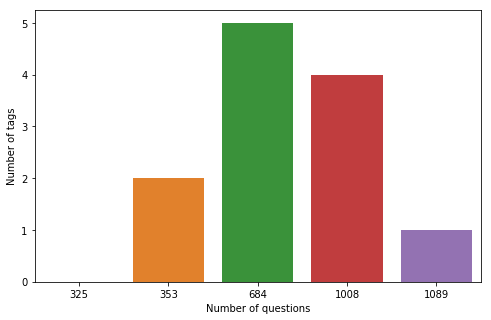

In [86]:
plt.figure(figsize=(8,5))
counts = df_tags['Id'].value_counts()
counts = counts.value_counts()
print("Total number of questions " + str(len(counts)))
sns.barplot(x=counts,y=counts.index)
plt.xlabel("Number of questions")
plt.ylabel("Number of tags")

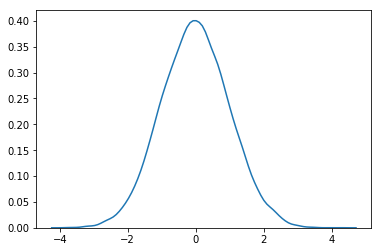

In [165]:
# Here graph is generated for Random value
sns.distplot(random.normal(size=20000), hist=False)

##  Calculation Of Mean ,Median,Standard Devation

### Mean meadian And Standard Diviation of question.csv

### Scores:

In [8]:
mean_id = df_questions['Score'].mean()
print ('Mean Scores: ' + str(mean_id))

Mean Scores: 20.024585477415666


In [9]:
median_id = df_questions['Score'].median() 
print ('Median Scores: ' + str(median_id))

Median Scores: 5.0


In [10]:
std_id = df_questions['Score'].std()
print ('std Scores: ' + str(std_id))

std Scores: 46.45880992796163


## Mean meadian And Standard Diviation of Answer.csv

### Scores:

In [11]:
mean_id = df_Answers['Score'].mean()
print ('Mean Scores: ' + str(mean_id))

Mean Scores: 10.597823855471155


In [12]:
median_id = df_Answers['Score'].median() 
print ('Median Scores: ' + str(median_id))

Median Scores: 2.0


In [13]:
std_id = df_Answers['Score'].std()
print ('std_Scores: ' + str(std_id))

std_Scores: 56.80880343044578


## Discribing the Dataset

### Question Dataset

In [19]:
df_questions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359 entries, 1 to 4966
Data columns (total 7 columns):
Id              359 non-null int64
OwnerUserId     359 non-null float64
CreationDate    359 non-null object
ClosedDate      359 non-null object
Score           359 non-null int64
Title           359 non-null object
Body            359 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 22.4+ KB


In [21]:
df_questions['Id'].describe()

count       359.000000
mean     158615.543175
std      102380.576153
min          90.000000
25%       61755.000000
50%      154310.000000
75%      241295.000000
max      351400.000000
Name: Id, dtype: float64

### Answer Dataset

In [106]:
df_Answers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9742 entries, 0 to 9999
Data columns (total 6 columns):
Id              9742 non-null int64
OwnerUserId     9742 non-null float64
CreationDate    9742 non-null object
ParentId        9742 non-null int64
Score           9742 non-null int64
Body            9742 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 532.8+ KB


In [107]:
df_Answers['Id'].describe()

count      9742.000000
mean      97574.363272
std       53624.844785
min          92.000000
25%       52106.000000
50%       98701.000000
75%      144778.500000
max      188951.000000
Name: Id, dtype: float64

### Tags Dataset

In [114]:
df_Tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Id     10000 non-null int64
Tag    10000 non-null object
dtypes: int64(1), object(1)
memory usage: 156.3+ KB


In [115]:
df_Tags['Id'].describe()

count     10000.000000
mean     140156.352000
std       74585.436823
min          80.000000
25%       74190.000000
50%      145645.000000
75%      204365.000000
max      262150.000000
Name: Id, dtype: float64

### Visualisation Of Answers dataset Scores

[Text(0, 0.5, 'Id'),
 Text(0.5, 0, 'Scores'),
 Text(0.5, 1.0, 'Density_Plot Of Scores')]

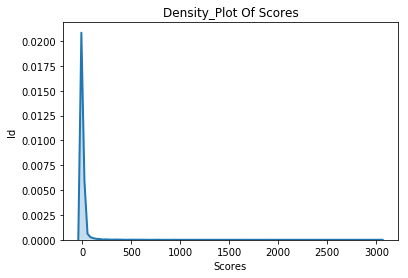

In [160]:
ax = sns.distplot(df_Answers['Score'],kde=True, hist=False,bins=20,kde_kws={"shade":True, "linewidth":"2"})
ax.set(title="Density_Plot Of Scores",xlabel="Scores", ylabel="Id")

[Text(0, 0.5, 'Id'),
 Text(0.5, 0, 'Scores'),
 Text(0.5, 1.0, 'Density_Plot Of Scores')]

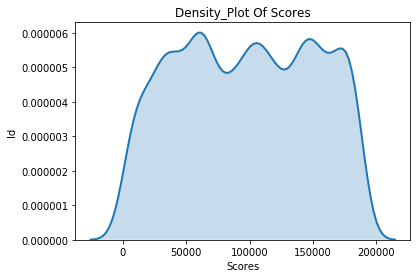

In [161]:
ax = sns.distplot(df_Answers['Id'],kde=True, hist=False,bins=20,kde_kws={"shade":True, "linewidth":"2"})
ax.set(title="Density_Plot Of Scores",xlabel="Scores", ylabel="Id")

### Hypothesis Testing

In [50]:
lowerDate = np.datetime64('2017-07-24')
upperDate = np.datetime64('2017-07-26')

dff=df_questions.loc[(df_questions.CreationDate >= '2008-1-1') & (df_questions.CreationDate <= '2008-9-1'), ['CreationDate','Score']]
def hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha))
    hypo_z = (sample_mean - pop_mean) / (std_dev/math.sqrt(sample_size))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z:
        return True
    else:
        return False
    
alpha = 0.05
sample_mean = np.mean(dff.Score)
pop_mean = df_questions['Score'].mean()
sample_size =  70
std_dev = np.std(df_questions.Score, ddof=1)

print('H0 : μ <=', pop_mean)
print('H1 : μ >', pop_mean)
print('alpha value is :', alpha, '\n')

reject=hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
     print('Failed to reject NULL hypothesis')

H0 : μ <= 20.024585477415666
H1 : μ > 20.024585477415666
alpha value is : 0.05 

actual z value : 1.6448536269514729
hypothesis z value : 1.3065685067680883 

Failed to reject NULL hypothesis


### Regresssion Testing

In [15]:
# Columns list
print(df_questions.columns.tolist())

['Id', 'OwnerUserId', 'CreationDate', 'ClosedDate', 'Score', 'Title', 'Body']


In [16]:
# Columns list
print(df_Answers.columns.tolist())

['Id', 'OwnerUserId', 'CreationDate', 'ParentId', 'Score', 'Body']


In [17]:
# Columns list
print(df_Tags.columns.tolist())

['Id', 'Tag']


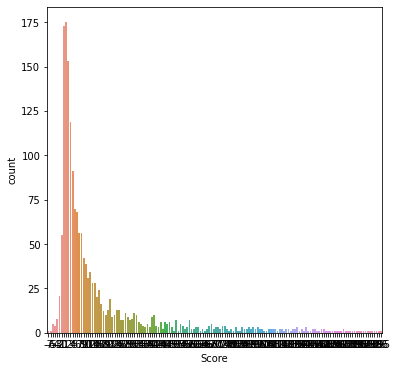

In [18]:
# Barplot for Number Scores Given for the Questions
plt.figure(figsize=(6,6))
sns.countplot(x='Score',data=df_questions);

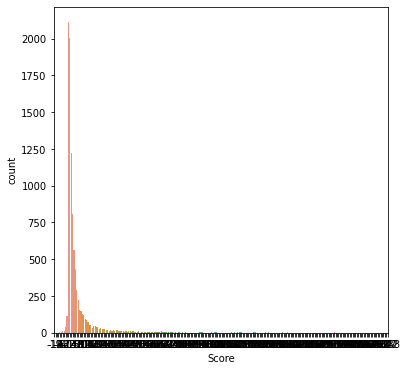

In [19]:
# Barplot for Number Scores Given for the Answers
plt.figure(figsize=(6,6))
sns.countplot(x='Score',data=df_Answers);

Total number of questions 66


Text(0, 0.5, 'Number of tags')

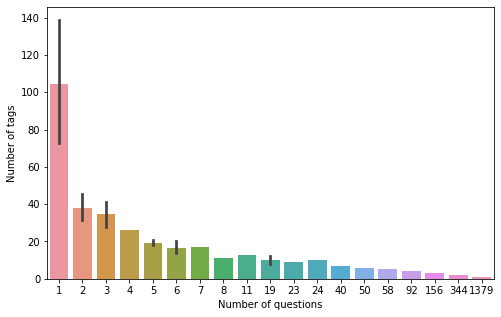

In [20]:
plt.figure(figsize=(8,5))
counts = df_Tags['Tag'].value_counts()
counts = counts.value_counts()
print("Total number of questions " + str(len(counts)))
sns.barplot(x=counts,y=counts.index)
plt.xlabel("Number of questions")
plt.ylabel("Number of tags")

In [21]:
#Regression Model
# These are the columns which are independant variables
colm1 = ['Id']

In [23]:
X = df_questions[colm1]
y = df_questions['Score']

In [24]:
# If anything has empty value then fill it with 0.0
X.fillna(0.0,inplace=True) 

In [25]:
# Split the dataset for training and testing
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
L = [0.00001,0.001,0.01,0.1,1,10] # These are regularization constant(C) using in regression
accuracy = {}
for i in L:
    LR = LogisticRegression(C=i)
    LR.fit(train_X,train_y)
    pred_y = LR.predict(test_X) # Prediction for testing dataset

    accuracy[i]=100*accuracy_score(pred_y,test_y)


In [27]:
#Printing the accuracy
accuracy

{1e-05: 9.714285714285714,
 0.001: 9.714285714285714,
 0.01: 9.714285714285714,
 0.1: 9.714285714285714,
 1: 9.714285714285714,
 10: 9.714285714285714}

Counter({0: 9900, 1: 100})


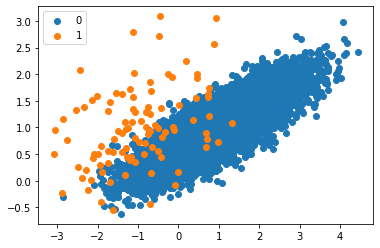

In [47]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

          -5       0.00      0.00      0.00         2
          -4       0.00      0.00      0.00         1
          -3       0.00      0.00      0.00         3
          -2       0.00      0.00      0.00         3
          -1       0.00      0.00      0.00        18
           0       0.00      0.00      0.00        58
           1       0.10      1.00      0.18        51
           2       0.00      0.00      0.00        44
           3       0.00      0.00      0.00        31
           4       0.00      0.00      0.00        34
           5       0.00      0.00      0.00        21
           6       0.00      0.00      0.00        22
           7       0.00      0.00      0.00        16
           8       0.00      0.00      0.00        15
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00        16
          11       0.00      0.00      0.00        13
          12       0.00    

Text(0, 0.5, 'Accuracy')

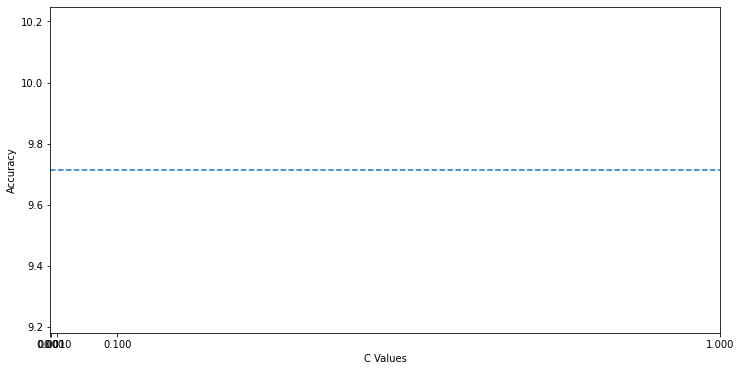

In [35]:
# C values vs Accuacy curve
plt.figure(figsize=(12,6))
plt.plot( list(accuracy.keys()), list(accuracy.values()), '--')
plt.xticks(list(accuracy.keys()))
plt.xlim(0,1)
plt.xlabel("C Values")
plt.ylabel("Accuracy")

In [36]:
#Here we are taking the c value as 0.526 as constant
LR = LogisticRegression(C=0.526)
LR.fit(train_X,train_y)
pred_y = LR.predict(test_X)

In [37]:
# Confusion metrics
from sklearn.metrics import confusion_matrix
confusion_matrix(pred_y,test_X)

array([[0, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [38]:
# Final accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(pred_y,test_y)

0.09714285714285714

In [39]:
# Contribution of each variable
LR.coef_

array([[-4.06418453e-07],
       [ 2.72860232e-07],
       [ 1.87418968e-06],
       [ 2.03306395e-06],
       [ 1.99706315e-06],
       [ 3.15406427e-06],
       [ 3.58521305e-06],
       [ 4.16087204e-06],
       [ 4.18280004e-06],
       [ 4.04370718e-06],
       [ 3.99904018e-06],
       [ 3.77024181e-06],
       [ 3.59276458e-06],
       [ 3.46481457e-06],
       [ 3.42925448e-06],
       [ 3.47500392e-06],
       [ 3.51308073e-06],
       [ 2.99198229e-06],
       [ 2.82711929e-06],
       [ 3.26752768e-06],
       [ 2.84332948e-06],
       [ 2.76341529e-06],
       [ 2.82610369e-06],
       [ 2.90679567e-06],
       [ 2.67705019e-06],
       [ 2.09750953e-06],
       [ 2.44494993e-06],
       [ 2.39939147e-06],
       [ 2.51834592e-06],
       [ 2.27451628e-06],
       [ 2.00436682e-06],
       [ 2.37694188e-06],
       [ 2.75230331e-06],
       [ 1.66658596e-06],
       [ 2.01851770e-06],
       [ 2.14265328e-06],
       [ 1.97935111e-06],
       [ 1.05632768e-06],
       [ 1.8

In [ ]:
# # ROC and AUC
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve
# logit_roc_auc = roc_auc_score(pred_y, LR.predict(test_X))
# fpr, tpr, thresholds = roc_curve(pred_y, LR.predict_proba(test_X)[:,1])
# plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Logisic Regeression Curve')
# plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
# plt.show()
# # (pred_y,test_X)